<a href="https://colab.research.google.com/github/AmineHamdi-hub/MachineLearningProject/blob/main/ML_Amine_Hamdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analyse des Données et Modélisation sur Auto.csv
# Ce notebook présente une analyse exploratoire complète, suivie de la modélisation supervisée (régression linéaire, régression logistique et Random Forest) et non supervisée (K-means, Agglomerative Clustering et DBSCAN) sur le jeu de données `Auto.csv`.  
# **Étapes abordées :**
# 1. Chargement et prétraitement des données  
# 2. Analyse exploratoire (statistiques descriptives, matrice de corrélation, histogrammes, pairplots et boxplots)  
# 3. Modélisation supervisée avec visualisation des performances  
# 4. Modélisation non supervisée avec visualisation des clusters



# Importation des bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour la modélisation supervisée

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Pour la modélisation non supervisée

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

## Chargement et Prétraitement des Données

In [ ]:
# On charge le fichier CSV et on impute les valeurs manquantes pour les variables numériques.

data_path = "Auto.csv"  # Assurez-vous que le fichier est dans le dossier data/
data = pd.read_csv(data_path)

# Imputation des valeurs manquantes pour les colonnes numériques
num_cols = data.select_dtypes(include=[np.number]).columns
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

print("Dimensions du dataset :", data.shape)
data.head()

Dimensions du dataset : (392, 9)


<ipython-input-32-04640d56ee26>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Analyse Exploratoire

### Statistiques Descriptives et Aperçu

In [ ]:
print("Statistiques Descriptives :")
print(data.describe())

print("\nInformations sur les données :")
data.info()

# Qualité des données
print("\nValeurs manquantes :")
print(data.isnull().sum())

print("\nValeurs dupliquées :")
print(data.duplicated().sum())


Statistiques Descriptives :
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
7

### Matrice de Corrélation

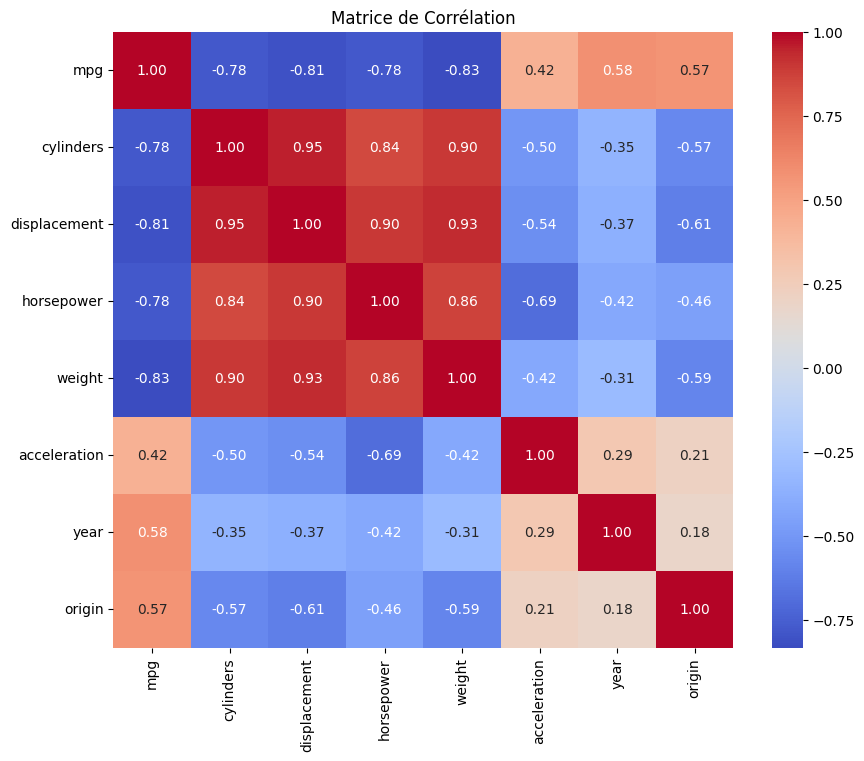

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

### Visualisations Complémentaires

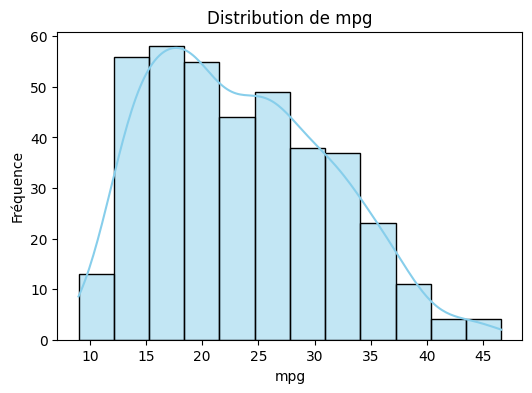

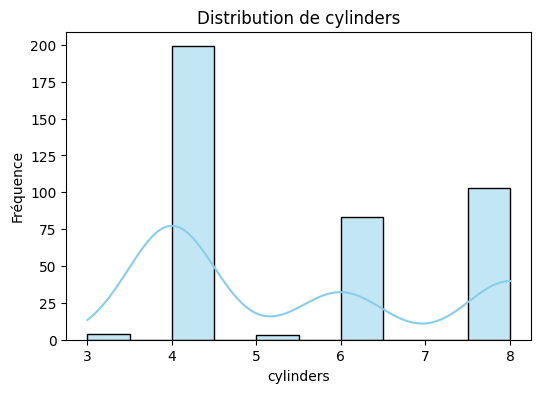

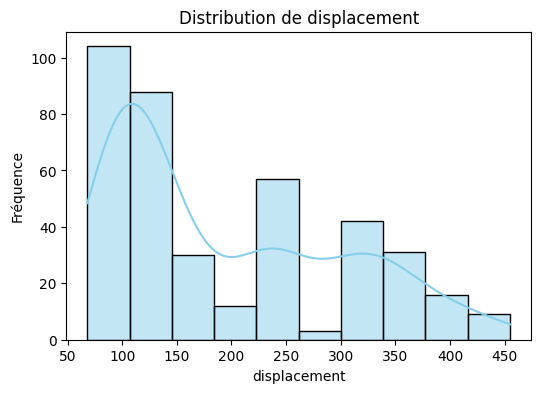

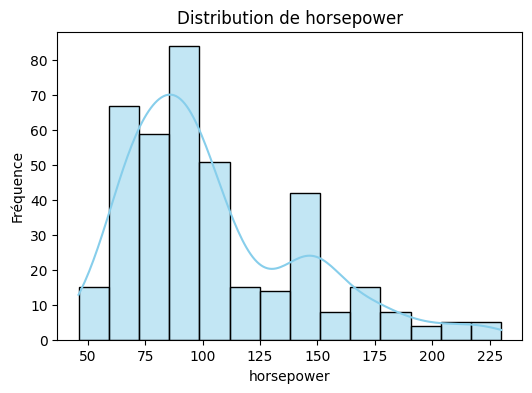

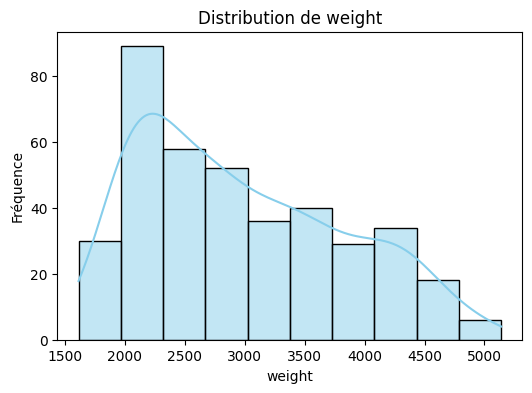

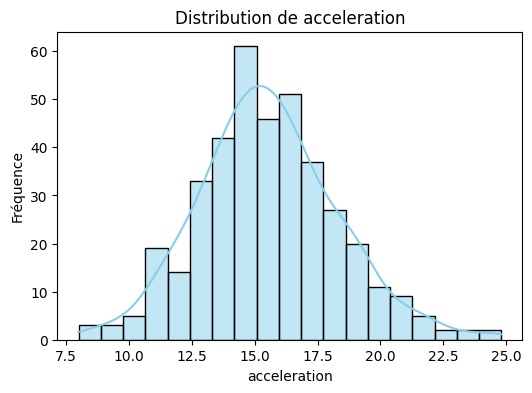

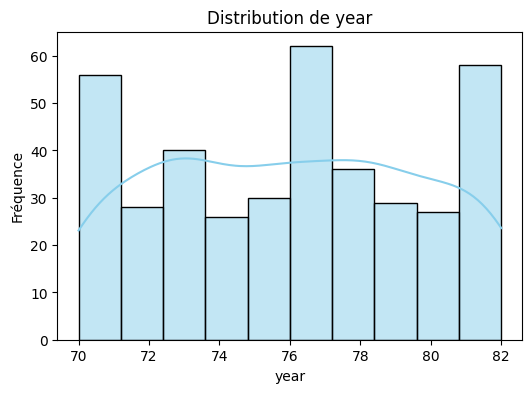

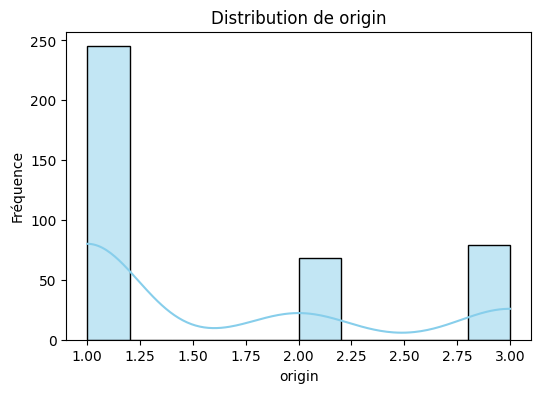

In [ ]:
# Histogrammes
for col in numeric_data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(numeric_data[col], kde=True, color="skyblue")
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

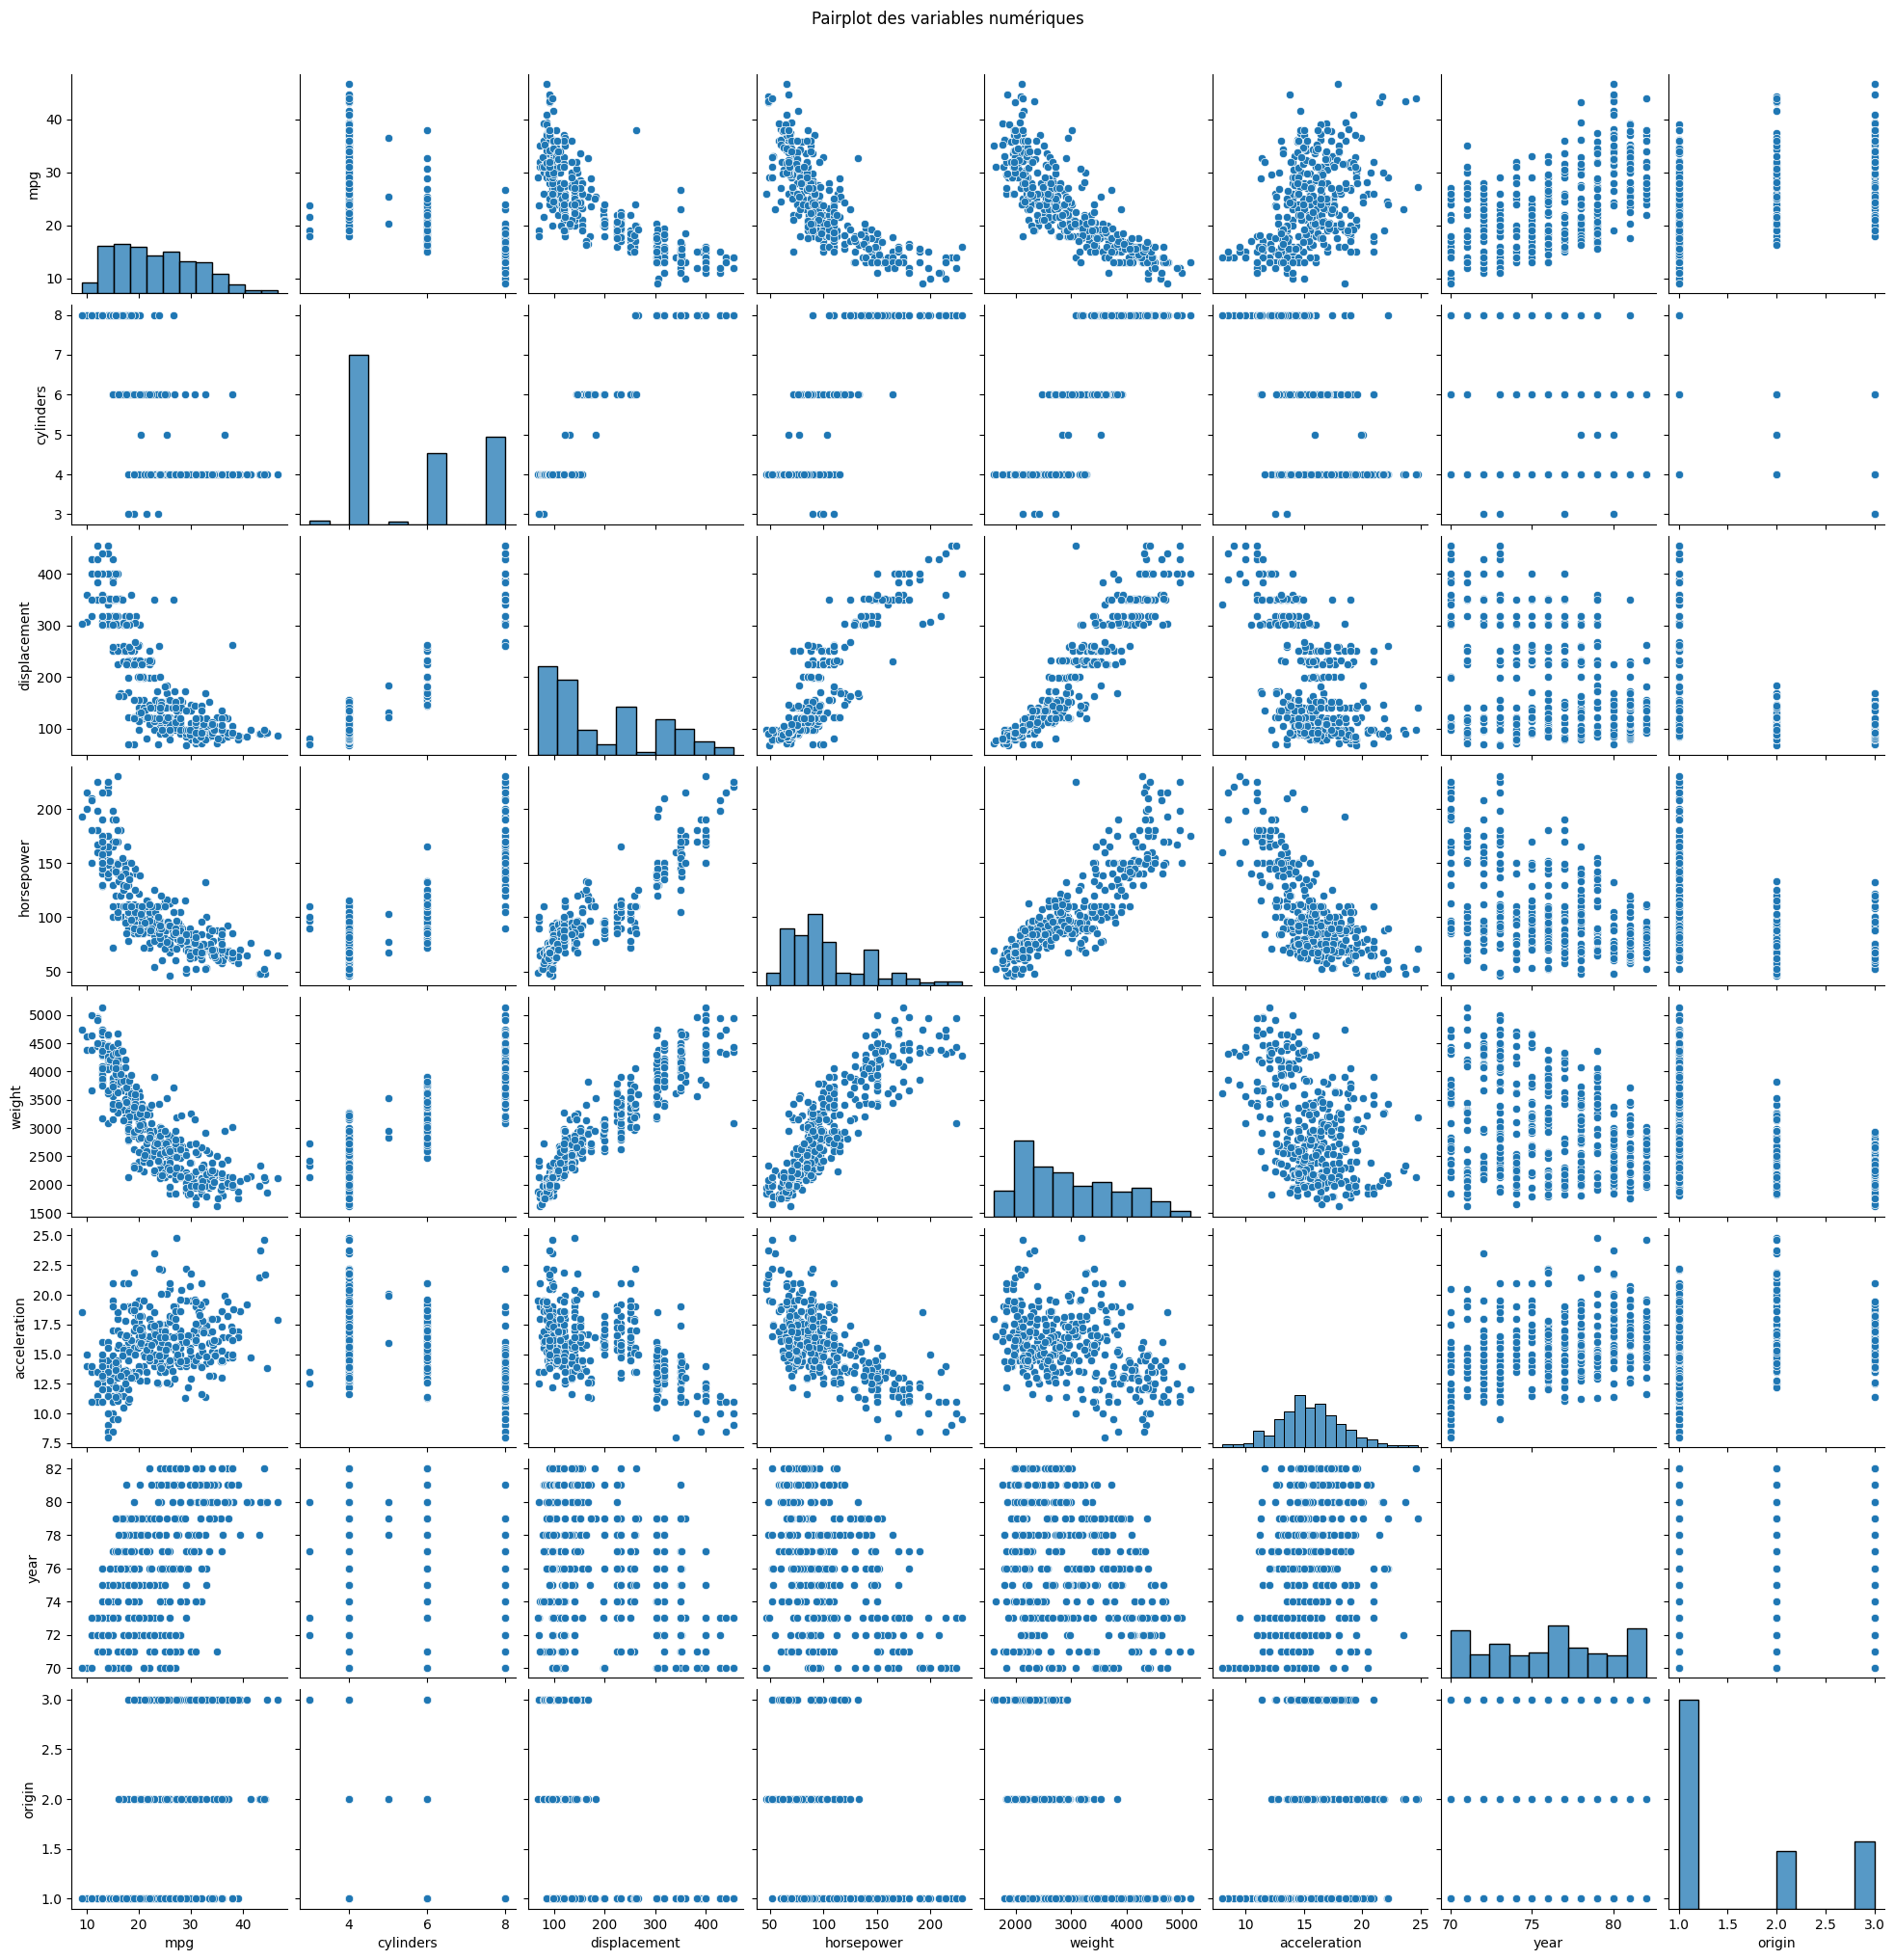

In [ ]:
# Pairplot
sns.pairplot(numeric_data)
plt.suptitle("Pairplot des variables numériques", y=1.02)
plt.show()

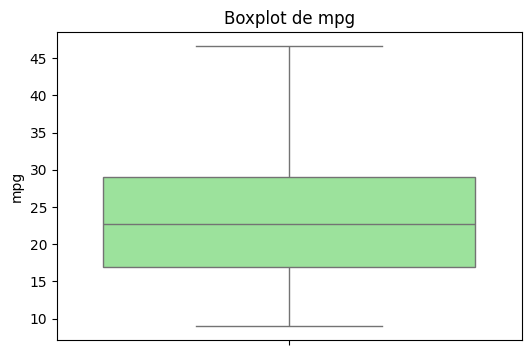

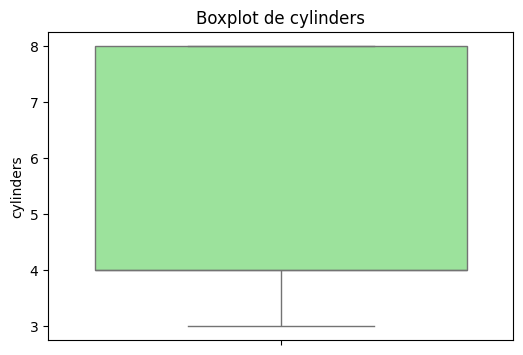

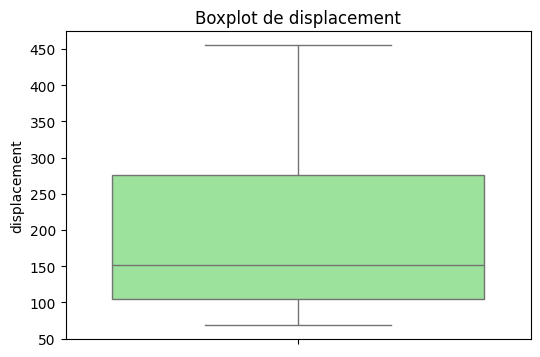

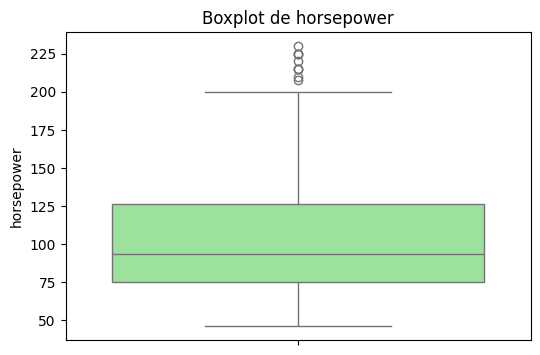

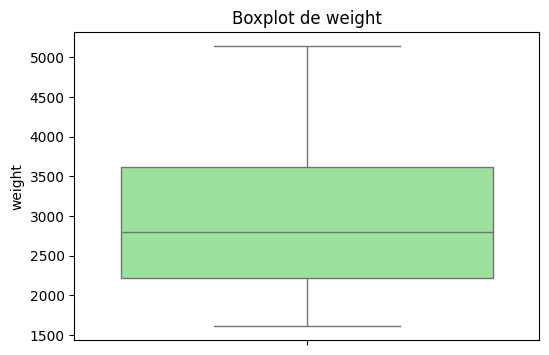

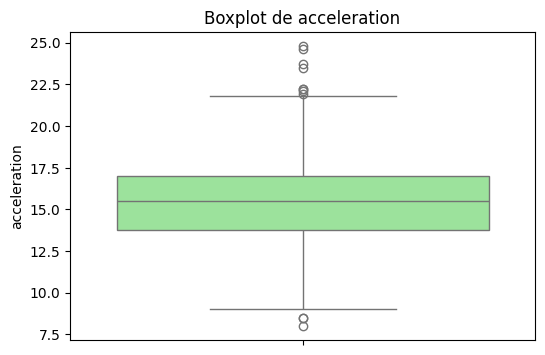

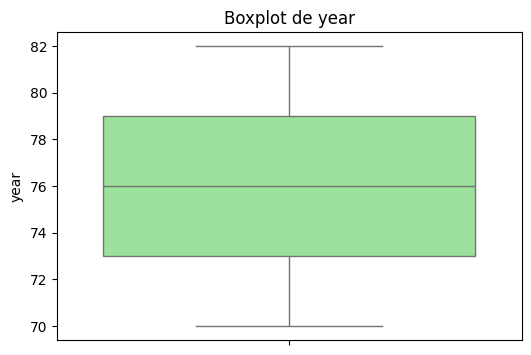

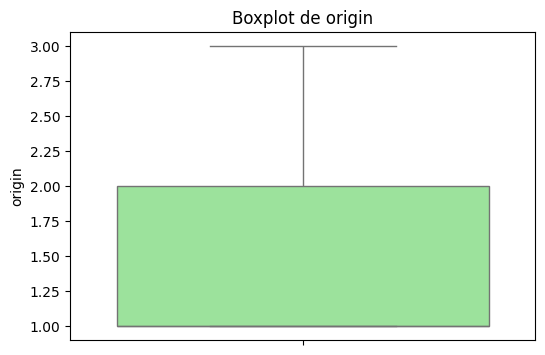

In [ ]:
# Boxplots
for col in numeric_data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=numeric_data[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.show()

## Modélisation Supervisée

 Pour cette section, nous prendrons la variable `mpg` comme cible et certaines features explicatives.  
 On va construire trois modèles :
- Régression Linéaire  
- Régression Logistique (après transformation binaire de mpg)  
- Random Forest (avec GridSearchCV pour l’optimisation des hyperparamètres)

In [ ]:
# Sélection des variables (exemple)
features = ["horsepower", "weight", "acceleration", "cylinders"]
target = "mpg"

X = data[features]
y = data[target]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline commun (imputation et normalisation)
pipeline_steps = [
    ('scaler', StandardScaler())
]

### Régression Linéaire

Régression Linéaire
MSE : 17.701621316193837
R² : 0.6531853636349529


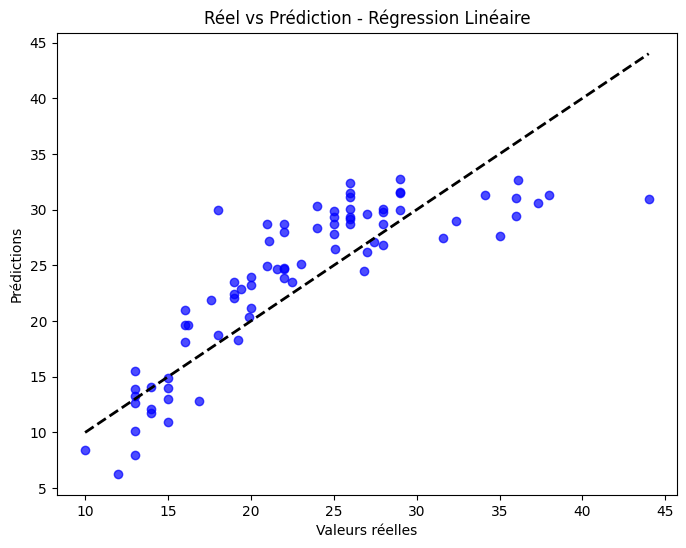

In [ ]:
pipe_lr = Pipeline(steps=pipeline_steps + [("model", LinearRegression())])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Régression Linéaire")
print("MSE :", mse_lr)
print("R² :", r2_lr)

# Visualisation (si une seule feature, sinon Réel vs Prédiction)
if len(features) == 1:
    feature = features[0]
    X_range = np.linspace(data[feature].min(), data[feature].max(), 100).reshape(-1, 1)
    y_range_pred = pipe_lr.predict(X_range)
    plt.figure(figsize=(8,6))
    plt.scatter(data[feature], data[target], alpha=0.5, label="Données")
    plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Ligne de régression")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title("Régression Linéaire")
    plt.legend()
    plt.show()
else:
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred_lr, alpha=0.7, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Prédictions")
    plt.title("Réel vs Prédiction - Régression Linéaire")
    plt.show()

### Régression Logistique

Distribution de la variable cible (binaire) : mpg
0    196
1    196
Name: count, dtype: int64
Régression Logistique
Accuracy : 0.8987341772151899
Matrice de Confusion :


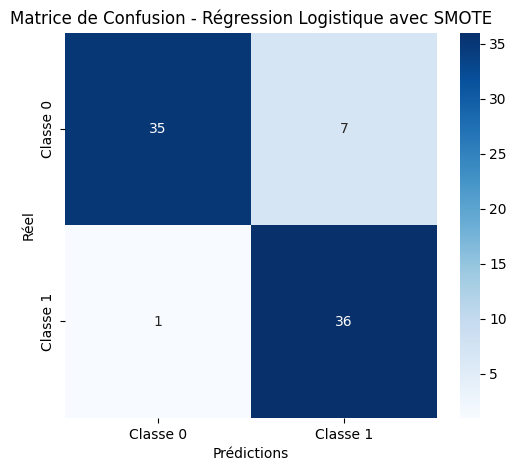

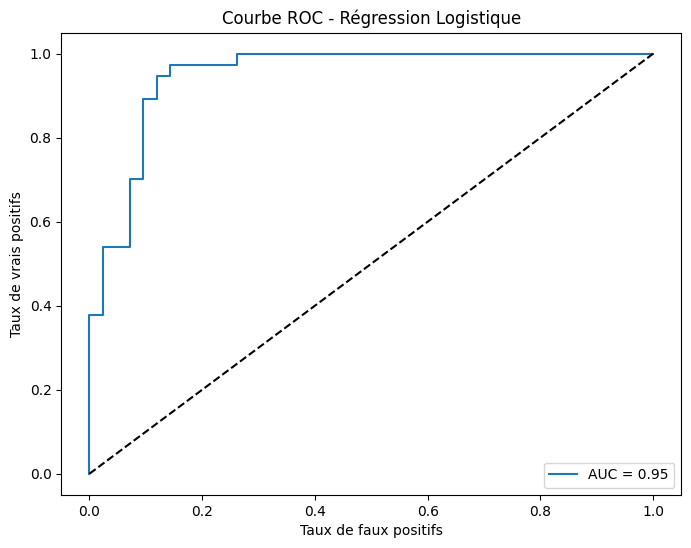

In [ ]:
median_mpg = y.median()
y_class = (y > median_mpg).astype(int)
print("Distribution de la variable cible (binaire) :", y_class.value_counts())

# Division en ensembles d'entraînement et de test pour la classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

pipe_log = Pipeline(steps=pipeline_steps + [("model", LogisticRegression(max_iter=1000))])
pipe_log.fit(X_train_c, y_train_c)
y_pred_log = pipe_log.predict(X_test_c)
acc_log = accuracy_score(y_test_c, y_pred_log)

print("Régression Logistique")
print("Accuracy :", acc_log)
print("Matrice de Confusion :")
# 🔹 Calcul de la matrice de confusion
cm = confusion_matrix(y_test_c, y_pred_log)

# 🔹 Visualisation avec seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Régression Logistique avec SMOTE")
plt.show()

# Courbe ROC
if hasattr(pipe_log.named_steps["model"], "predict_proba"):
    y_score_log = pipe_log.predict_proba(X_test_c)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_c, y_score_log)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1], [0,1], "k--")
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.title("Courbe ROC - Régression Logistique")
    plt.legend(loc="lower right")
    plt.show()

### Régression Logistique+SMOTE

On transforme `mpg` en variable binaire (selon la médiane) pour effectuer une classification.

Distribution de la variable cible (binaire) : mpg
0    196
1    196
Name: count, dtype: int64
Régression Logistique
Accuracy : 0.9113924050632911
Matrice de Confusion :


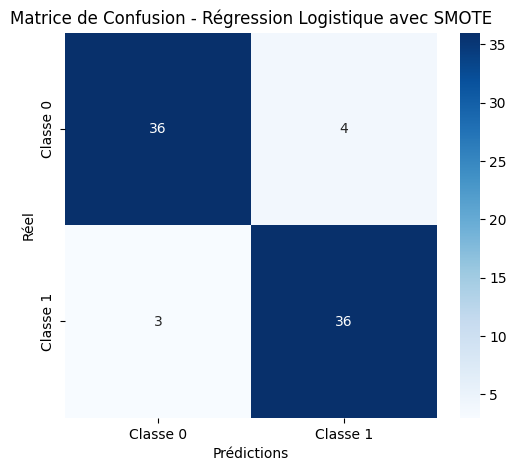

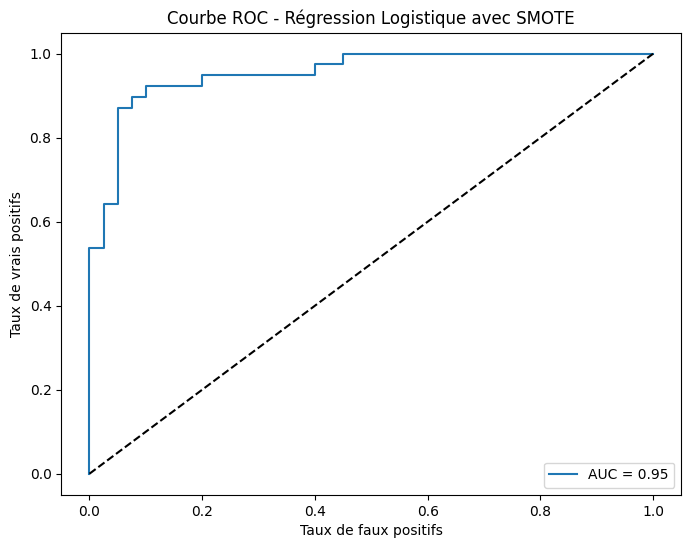

In [ ]:
# 🔹 Binarisation de la variable cible
median_mpg = y.median()
y_class = (y > median_mpg).astype(int)
print("Distribution de la variable cible (binaire) :", y_class.value_counts())

# 🔹 Division des données AVANT SMOTE
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

# 🔹 Application de SMOTE UNIQUEMENT sur l'ensemble d'entraînement
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_c_smote, y_train_c_smote = smote.fit_resample(X_train_c, y_train_c)

pipe_log = Pipeline(steps=pipeline_steps + [("model", LogisticRegression(max_iter=1000))])

# 🔹 Entraînement du modèle sur les données rééchantillonnées
pipe_log.fit(X_train_c_smote, y_train_c_smote)

# 🔹 Prédictions
y_pred_log = pipe_log.predict(X_test_c)
acc_log = accuracy_score(y_test_c, y_pred_log)

# 🔹 Affichage des résultats
print("Régression Logistique")
print("Accuracy :", acc_log)
print("Matrice de Confusion :")
# 🔹 Calcul de la matrice de confusion
cm = confusion_matrix(y_test_c, y_pred_log)

# 🔹 Visualisation avec seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Régression Logistique avec SMOTE")
plt.show()

# 🔹 Courbe ROC
if hasattr(pipe_log.named_steps["model"], "predict_proba"):
    y_score_log = pipe_log.predict_proba(X_test_c)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_c, y_score_log)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1], [0,1], "k--")
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.title("Courbe ROC - Régression Logistique avec SMOTE")
    plt.legend(loc="lower right")
    plt.show()

### Random Forest avec Optimisation (GridSearchCV)

Random Forest
Meilleurs hyperparamètres : {'model__max_depth': 5, 'model__n_estimators': 80}
MSE : 15.67881807221493
R² : 0.6928166357635008


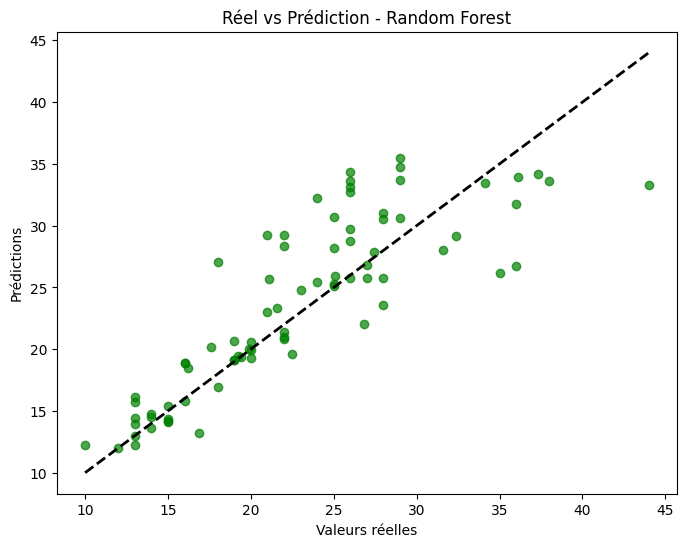

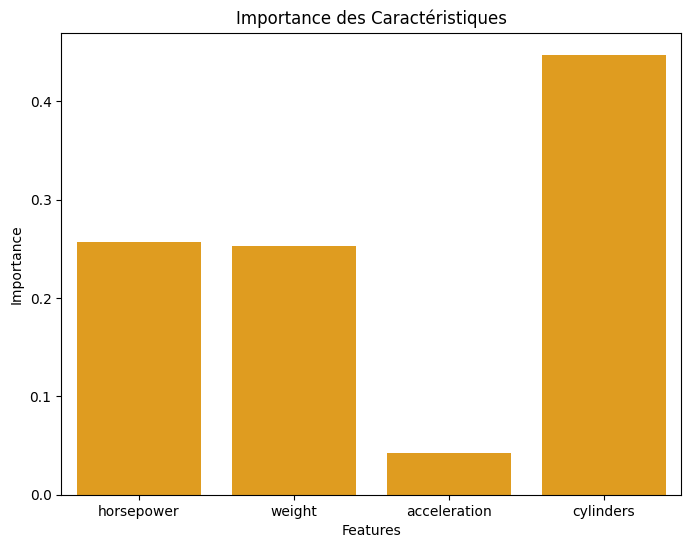

In [ ]:
pipe_rf = Pipeline(steps=pipeline_steps + [("model", RandomForestRegressor(random_state=42))])
# Paramètres pour GridSearchCV
n_estimators = 100  # Exemple, vous pouvez ajuster
param_grid = {
    "model__n_estimators": [n_estimators - 20, n_estimators, n_estimators + 20],
    "model__max_depth": [None, 5, 10]
}

grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("MSE :", mse_rf)
print("R² :", r2_rf)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Réel vs Prédiction - Random Forest")
plt.show()

# Importance des caractéristiques
importances = best_model_rf.named_steps["model"].feature_importances_
plt.figure(figsize=(8,6))
sns.barplot(x=features, y=importances, color="orange")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Importance des Caractéristiques")
plt.show()

## Modélisation Non Supervisée

Nous utilisons ici uniquement les variables numériques pour le clustering.  
Choisissez deux ou plusieurs variables parmi par exemple `horsepower`, `weight`, `acceleration`, etc.

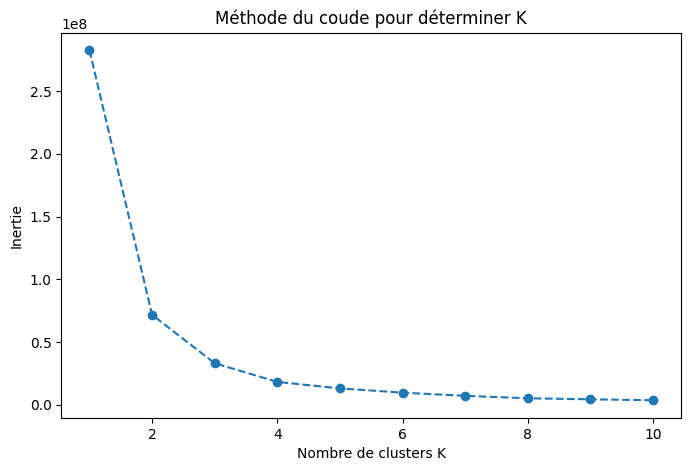

K-means :
Inertie : 32960257.808551908
Silhouette Score : 0.5910508532337588


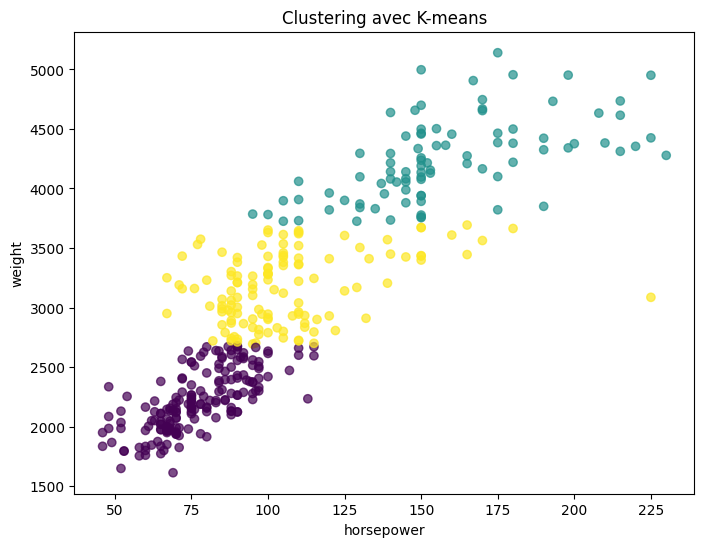

Agglomerative Clustering - Silhouette Score : 0.5357968795491526


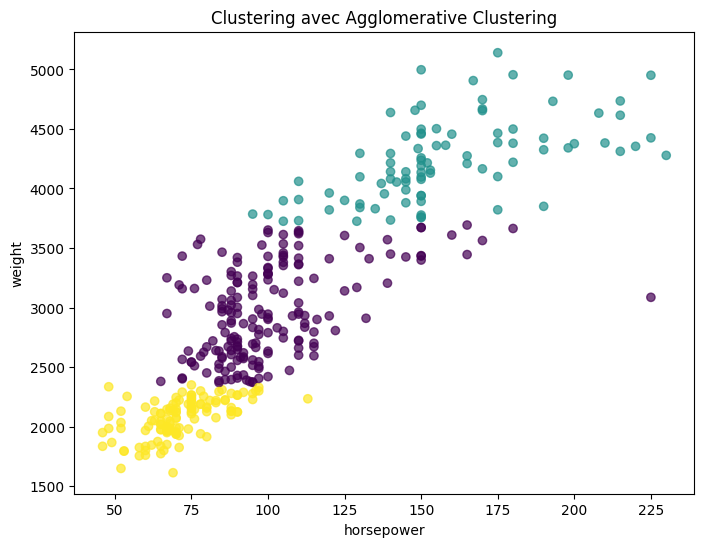

In [ ]:
# Sélection des variables pour le clustering
features_cluster = ["horsepower", "weight"]
X_cluster = data[features_cluster]

# Determiner le nombre optimal de clusters avec la methode du coude
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Afficher la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer K')
plt.show()

# --- K-means ---
k = 3  # Exemple de nombre de clusters
kmeans_model = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans_model.fit_predict(X_cluster)
inertia_kmeans = kmeans_model.inertia_
silhouette_kmeans = silhouette_score(X_cluster, clusters_kmeans)
print("K-means :")
print("Inertie :", inertia_kmeans)
print("Silhouette Score :", silhouette_kmeans)

# Visualisation des clusters
plt.figure(figsize=(8,6))
plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 1], c=clusters_kmeans, cmap="viridis", alpha=0.7)
plt.xlabel(features_cluster[0])
plt.ylabel(features_cluster[1])
plt.title("Clustering avec K-means")
plt.show()

# %%
# --- Agglomerative Clustering ---
n_clusters = 3
agg_model = AgglomerativeClustering(n_clusters=n_clusters)
clusters_agg = agg_model.fit_predict(X_cluster)
if n_clusters > 1:
    silhouette_agg = silhouette_score(X_cluster, clusters_agg)
    print("Agglomerative Clustering - Silhouette Score :", silhouette_agg)

plt.figure(figsize=(8,6))
plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 1], c=clusters_agg, cmap="viridis", alpha=0.7)
plt.xlabel(features_cluster[0])
plt.ylabel(features_cluster[1])
plt.title("Clustering avec Agglomerative Clustering")
plt.show()